# MUSHROOM PROJECT

Submitted by: SINDHU SHREE N
    
Batch Number:1832

In [1]:
#import all the required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_recall_curve,roc_curve
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing the csv file
df=pd.read_csv("mushroom.csv")
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
df.keys()

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [4]:
df.shape

(8124, 23)

So there are 8124 rows and 23 columns in the dataset.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

So we can see that all the datatypes of given data is of object type.

In [6]:
#to check the null values
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

<AxesSubplot:>

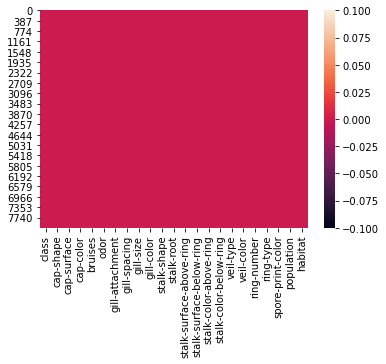

In [7]:
#checking null values using heatmap
sns.heatmap(df.isnull())

There is no Null values in the dataset.

# Summary Statistics:

In [8]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


# Outcome of describe:

The dataset consists:

     Number of rows:8124
     Number of colums:23
     
1.The unique will give us the number of unique data in each column.For example, there are only 2 unique entries in 'class'       column.


2.Top will give us the entries of first row.

3. Freq is most common value frequency.

# Exploratory Data Analysis:

Text(0.5, 1.0, 'Number of mushrooms')

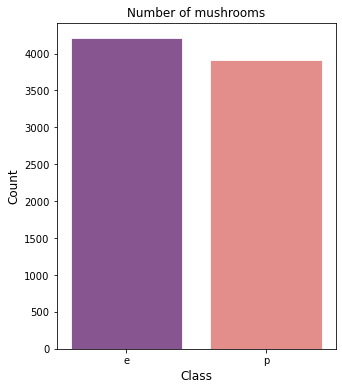

In [9]:
#plotting the graph for two catagories in class namely p and e
count = df['class'].value_counts()
plt.figure(figsize=(5,6))
sns.barplot(count.index,count.values,alpha=0.8,palette="magma",edgecolor='w')
plt.ylabel('Count',fontsize=12)
plt.xlabel('Class',fontsize=12)
plt.title('Number of mushrooms')

In [10]:
#checking the type of each variable 
df = df.astype('category')
df.dtypes

class                       category
cap-shape                   category
cap-surface                 category
cap-color                   category
bruises                     category
odor                        category
gill-attachment             category
gill-spacing                category
gill-size                   category
gill-color                  category
stalk-shape                 category
stalk-root                  category
stalk-surface-above-ring    category
stalk-surface-below-ring    category
stalk-color-above-ring      category
stalk-color-below-ring      category
veil-type                   category
veil-color                  category
ring-number                 category
ring-type                   category
spore-print-color           category
population                  category
habitat                     category
dtype: object

By observing we can clearly say that the data is categorical and since the data is having more than two categories we need to use label encoder technique.

# Using LabelEncoder() method:

In [11]:
#using labelencoder
labelencoder=LabelEncoder()
for column in df.columns:
    df[column]=labelencoder.fit_transform(df[column])

In [12]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [13]:
df['veil-type']

0       0
1       0
2       0
3       0
4       0
       ..
8119    0
8120    0
8121    0
8122    0
8123    0
Name: veil-type, Length: 8124, dtype: int32

Since all the values in veil-type are zero, so it is not contributing anything so that we can drop that column. 

In [14]:
#dropping the column
df=df.drop(['veil-type'],axis=1)

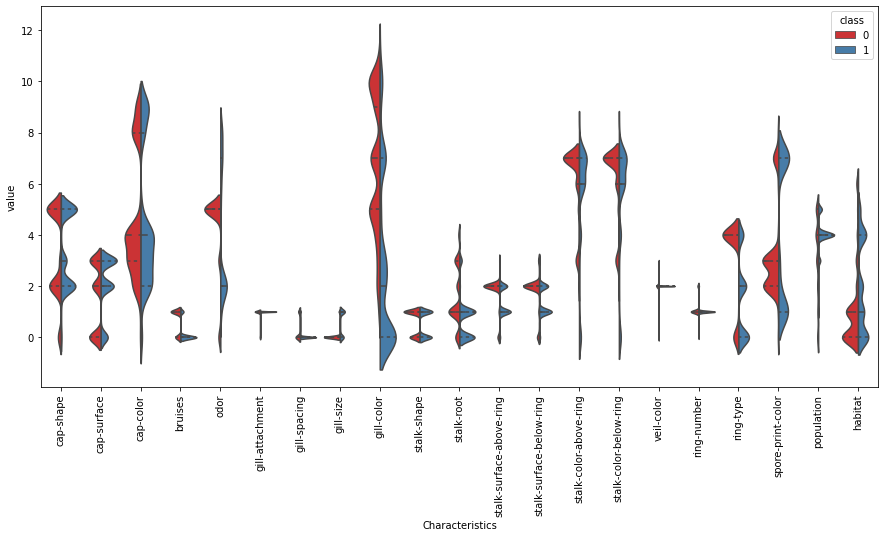

In [15]:
#violin plot
df_div = pd.melt(df, "class", var_name="Characteristics")
fig,ax = plt.subplots(figsize=(15,7))
p = sns.violinplot(ax = ax,x="Characteristics",y="value",hue="class",split='True', data=df_div, inner='quartile',palette = 'Set1')
df_no_class = df.drop(["class"],axis = 1)
p.set_xticklabels(rotation = 90, labels = list(df_no_class.columns));


# Correlation:

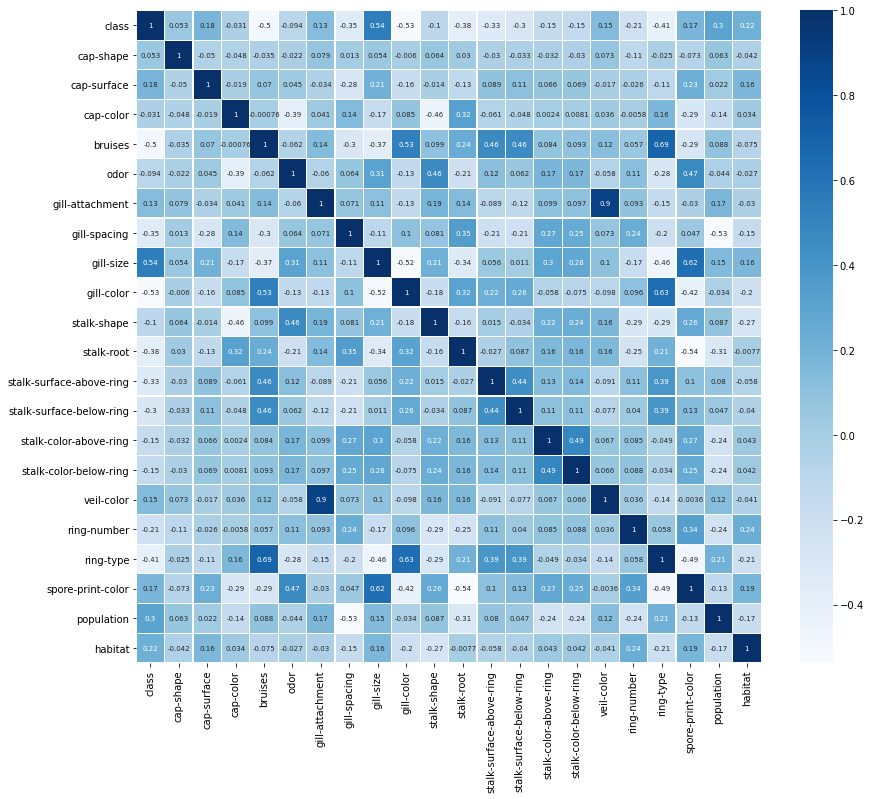

In [16]:
#to check the correlation
plt.figure(figsize=(14,12))
sns.heatmap(df.corr(),linewidths=.2,cmap="Blues",annot=True, annot_kws={"size": 7})
plt.yticks(rotation=0);

Our target class is having a moderatively positive correlation with all the other attributes.

# Preparing the data and splitting the data:

In [17]:
x = df.drop(['class'],axis=1)
y = df["class"]
x_train, x_test, y_train, y_test=train_test_split(x, y, random_state=42, test_size=0.1)

Since we are having a categorical data that are classified. We need to use classification algorithms.

Our target 'class' is having only two categories let us use a logistic regression.

# Using Logistic Regression:

In [19]:
lr = LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [20]:
y_pred_lr = lr.predict(x_test)
print("Logistic Regression Classifier: \n\n",classification_report(y_test,y_pred_lr))
print("Test Accuracy:{}%".format(round(lr.score(x_test,y_test)*100,2)))

Logistic Regression Classifier: 

               precision    recall  f1-score   support

           0       0.96      0.94      0.95       433
           1       0.94      0.96      0.95       380

    accuracy                           0.95       813
   macro avg       0.95      0.95      0.95       813
weighted avg       0.95      0.95      0.95       813

Test Accuracy:95.08%


Text(0.5, 1.0, 'Confusion Matrix for Logistic Regression Classifier')

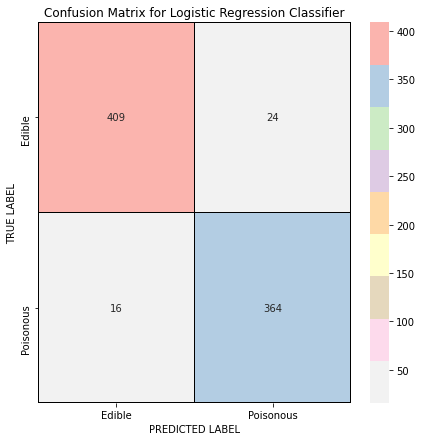

In [21]:
cm = confusion_matrix(y_test,y_pred_lr)
x_axis_labels = ["Edible","Poisonous"]
y_axis_labels = ["Edible","Poisonous"]
f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Pastel1_r", 
xticklabels=x_axis_labels,
yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Logistic Regression Classifier')

We got a Test_Accuracy=95.08% and even some errors are there in confusion matrix. Lets try with some classification algorithms to know whether the model can perform better than here.

# Using the Classification algorithms:

# 1. Decision Tree Classifier:

In [22]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [23]:
#predicting accuracy score of decision tree
y_pred_dt = dt.predict(x_test)
print("Decision Tree Classifier: \n\n",classification_report(y_test,y_pred_dt))
print("Test Accuracy:{}%".format(round(dt.score(x_test,y_test)*100,2)))

Decision Tree Classifier: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       433
           1       1.00      1.00      1.00       380

    accuracy                           1.00       813
   macro avg       1.00      1.00      1.00       813
weighted avg       1.00      1.00      1.00       813

Test Accuracy:100.0%


Text(0.5, 1.0, 'Confusion Matrix for Decision Tree Classifier')

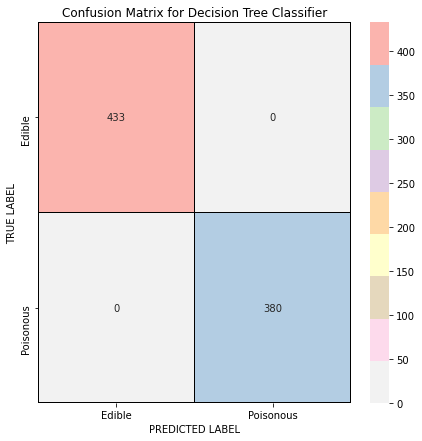

In [24]:
#finding confusion matrix for decision tree
cm = confusion_matrix(y_test,y_pred_dt)
x_axis_labels = ["Edible","Poisonous"]
y_axis_labels = ["Edible","Poisonous"]
f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Pastel1_r", 
xticklabels=x_axis_labels,
yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Decision Tree Classifier')

# 2. K-Nearest neighbor classifier:

In [25]:
from sklearn.neighbors import KNeighborsClassifier
best_Kvalue = 0
best_score = 0
for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    if knn.score(x_test,y_test) > best_score:
                                best_score = knn.score(x_train, y_train)
                                best_Kvalue = i
    print("Best KNN Value:{}".format(best_Kvalue )) 
    print("Test Accuarcy:{}".format(round(best_score*100,2)))

Best KNN Value:1
Test Accuarcy:100.0
Best KNN Value:1
Test Accuarcy:100.0
Best KNN Value:1
Test Accuarcy:100.0
Best KNN Value:1
Test Accuarcy:100.0
Best KNN Value:1
Test Accuarcy:100.0
Best KNN Value:1
Test Accuarcy:100.0
Best KNN Value:1
Test Accuarcy:100.0
Best KNN Value:1
Test Accuarcy:100.0
Best KNN Value:1
Test Accuarcy:100.0


In [26]:
KNN = KNeighborsClassifier()
KNN.fit(x_train,y_train)

KNeighborsClassifier()

In [27]:
#finding accuracy score in knn
y_pred_knn = knn.predict(x_test)
print(" KNN Classifier: \n\n",classification_report(y_test,y_pred_knn))
print("Test Accuracy:{}%".format(round(knn.score(x_test,y_test)*100,2)))


 KNN Classifier: 

               precision    recall  f1-score   support

           0       1.00      0.99      1.00       433
           1       0.99      1.00      1.00       380

    accuracy                           1.00       813
   macro avg       1.00      1.00      1.00       813
weighted avg       1.00      1.00      1.00       813

Test Accuracy:99.63%


Text(0.5, 1.0, 'Confusion Matrix for KNN Classifier')

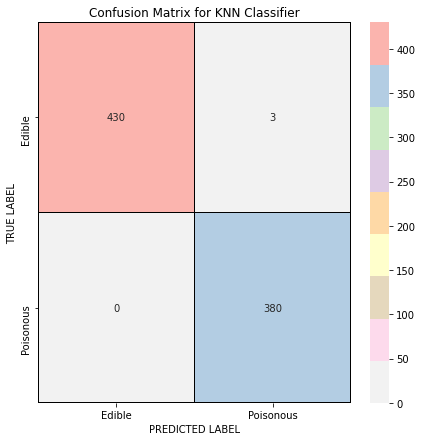

In [28]:
#finding confusion matrix for knn
cm = confusion_matrix(y_test,y_pred_knn)
x_axis_labels = ["Edible","Poisonous"]
y_axis_labels = ["Edible","Poisonous"]
f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Pastel1_r", 
xticklabels=x_axis_labels,
yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for KNN Classifier')

# 3. Support Vector Classifier:

In [29]:
svm = SVC()
svm.fit(x_train,y_train)

SVC()

In [30]:
#accuracy score of svc
y_pred_svm = svm.predict(x_test)
print(" SVM Classifier: \n\n",classification_report(y_test,y_pred_svm))
print("Test Accuracy:{}%".format(round(svm.score(x_test,y_test)*100,2)))


 SVM Classifier: 

               precision    recall  f1-score   support

           0       0.99      1.00      1.00       433
           1       1.00      0.99      1.00       380

    accuracy                           1.00       813
   macro avg       1.00      1.00      1.00       813
weighted avg       1.00      1.00      1.00       813

Test Accuracy:99.63%


Text(0.5, 1.0, 'Confusion Matrix for SVM Tree Classifier')

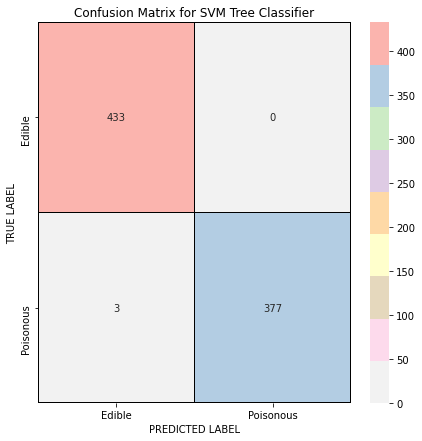

In [31]:
#confusion matrix for svc
cm = confusion_matrix(y_test,y_pred_svm)
x_axis_labels = ["Edible","Poisonous"]
y_axis_labels = ["Edible","Poisonous"]
f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Pastel1_r", 
xticklabels=x_axis_labels,
yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for SVM Tree Classifier')

# 4. GaussianNB Classifier:

In [32]:
nb = GaussianNB()
nb.fit(x_train,y_train)

GaussianNB()

In [33]:
#accuracy score of GaussianNB
y_pred_nb = nb.predict(x_test)
print(" Navie byes Classifier: \n\n",classification_report(y_test,y_pred_nb))
print("Test Accuracy:{}%".format(round(nb.score(x_test,y_test)*100,2)))

 Navie byes Classifier: 

               precision    recall  f1-score   support

           0       0.94      0.92      0.93       433
           1       0.91      0.94      0.92       380

    accuracy                           0.93       813
   macro avg       0.93      0.93      0.93       813
weighted avg       0.93      0.93      0.93       813

Test Accuracy:92.62%


Text(0.5, 1.0, 'Confusion Matrix for Naive Bayes  Classifier')

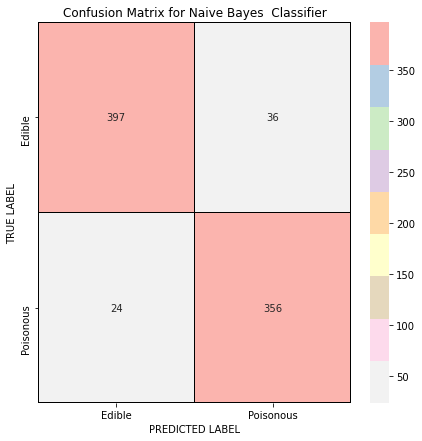

In [34]:
#confusion matrix of GaussianNB
cm = confusion_matrix(y_test,y_pred_nb)
x_axis_labels = ["Edible","Poisonous"]
y_axis_labels = ["Edible","Poisonous"]
f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Pastel1_r", 
xticklabels=x_axis_labels,
yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Naive Bayes  Classifier')

# 5. Random Forest Classifier:

In [35]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [36]:
#accuracy score of random forest classifier
y_pred_rf = rf.predict(x_test)
print(" Random Forest Classifier: \n\n",classification_report(y_test,y_pred_rf))
print("Test Accuracy:{}%".format(round(rf.score(x_test,y_test)*100,2)))

 Random Forest Classifier: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       433
           1       1.00      1.00      1.00       380

    accuracy                           1.00       813
   macro avg       1.00      1.00      1.00       813
weighted avg       1.00      1.00      1.00       813

Test Accuracy:100.0%


Text(0.5, 1.0, 'Confusion Matrix for Random Forest Classifier')

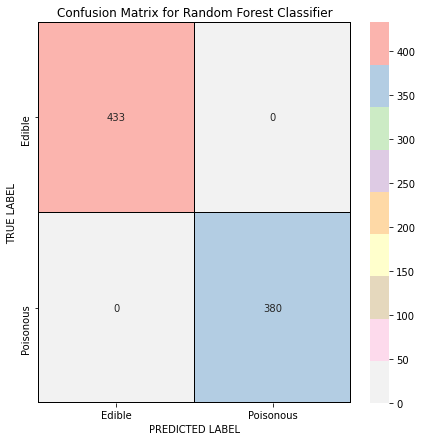

In [37]:
#finding confusion matrix for Random Forest classifier
cm = confusion_matrix(y_test,y_pred_rf)
x_axis_labels = ["Edible","Poisonous"]
y_axis_labels = ["Edible","Poisonous"]
f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Pastel1_r", 
xticklabels=x_axis_labels,
yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Random Forest Classifier')

Out of five classifiers we used above we can see that we are getting 100% accuracy in both "Decision Tree classifier" and "Random Forest classifier".
We can take anyone of them so here I am considering the Random Forest classifier for further study.

# Cross-Validation of the model:

In [39]:
from sklearn.model_selection import KFold
acc=accuracy_score(y_test,y_pred_rf)
for j in range(2,10):
    kfold=KFold(j)
    score=cross_val_score(rf,x,y,cv=kfold)
    print("At cv:",j)
    print("Accuracy_score is:",acc*100)
    print("Cross_validation_score is:",score.mean()*100)
    #print(score.std())
    print("\n")

At cv: 2
Accuracy_score is: 100.0
Cross_validation_score is: 74.56917774495322


At cv: 3
Accuracy_score is: 100.0
Cross_validation_score is: 84.17035942885279


At cv: 4
Accuracy_score is: 100.0
Cross_validation_score is: 94.8301329394387


At cv: 5
Accuracy_score is: 100.0
Cross_validation_score is: 99.85228495642289


At cv: 6
Accuracy_score is: 100.0
Cross_validation_score is: 99.77843426883308


At cv: 7
Accuracy_score is: 100.0
Cross_validation_score is: 100.0


At cv: 8
Accuracy_score is: 100.0
Cross_validation_score is: 100.0


At cv: 9
Accuracy_score is: 100.0
Cross_validation_score is: 100.0




# We are getting accuracy and cross validation both as 100% which shows our model is performing extremely well 

# Hyper parameter tuning:

In [44]:
from sklearn.model_selection import GridSearchCV

In [45]:
parameter = {'max_depth':np.arange(2,10),
             'criterion':['gini','entropy']}

In [47]:
GCV=GridSearchCV(RandomForestClassifier(),parameter,cv=7)

In [48]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=7, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9])})

Here we can take sklearn models criterion gini and entropy and estimator of RFC cv=7

In [49]:
GCV.best_params_

{'criterion': 'gini', 'max_depth': 8}

The best criterion is gini and max_depth=8.

In [52]:
Final_mod = RandomForestClassifier(criterion= 'gini',max_depth=8)
Final_mod.fit(x_train,y_train)
pred = Final_mod.predict(x_test)
acc=accuracy_score(y_test,pred)
print("Test Accuracy:",acc*100)

Test Accuracy: 100.0 %


# AUC ROC Curve:

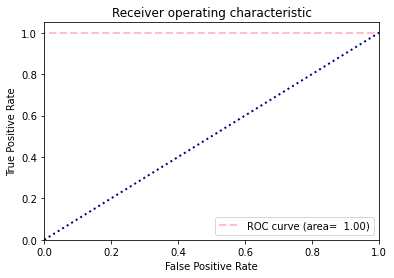

In [53]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds=roc_curve(y_pred_rf,y_test)
roc_auc=auc(fpr,tpr)
plt.figure()
plt.plot(fpr, tpr, color='pink', lw=2, linestyle='--',label='ROC curve (area= % 0.2f)' % roc_auc)
plt.plot([0,1],[0,1], color='navy',lw=2, linestyle='dotted')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# Saving the best model:

In [54]:
import pickle
filename = 'Bestmodel.pkl'
pickle.dump(rf, open(filename,'wb'))

# Conclusion:

In [55]:
#comparing the predicted and actual values
preds = rf.predict(x_test)

print("predicted value",preds[0:36])
print("Actual value:",y_test[0:36].values)

predicted value [0 1 1 0 1 1 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0 0 1]
Actual value: [0 1 1 0 1 1 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0 0 1]
